In [2]:
import math
import numpy as np
import matplotlib.pyplot as plt 
import scipy.stats as stats

Given the unnormalized density: $p(x) = exp(\frac{-x^2}{2})(\sin(x)^2 + 3\cos(x)^2\sin(7x)^2 + 1)$ for $x \in [-3,3]$, the task is to sample from this distribution and calulcate $E[x^2]$

1. Try the rejection sampling with a uniform proposal 
2. Try the rejection sampling with a normal distribution
3. Try self-normalized importance sampling with a gaussian proposal 
4. Repeat the previous sampling methods for sample sizes {10,100,1000}. For each method and each sample size, calculate the mean and standard deviation of the estimator $E[x^2]$, e.g. by repeating each simulation an appropriate number of times. Plot the values. Which method appears to perform better?

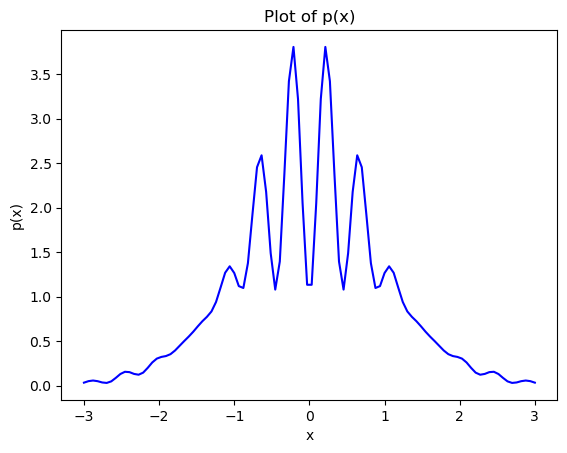

In [3]:
# visualization of the unnormalized density p(x) #

def p(x):
    return np.exp(-x**2 / 2) * (np.sin(x)**2 + 3 * np.cos(x)**2 * np.sin(7 * x)**2 + 1)

x = np.linspace(-3, 3, 100)

plt.plot(x, p(x), color='blue')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Plot of p(x)')
plt.show()

## Part 1

Sample from p(x) and calulcate $E[x^2]$ using rejection sampling with a uniform proposal 

Idea: 
- Wrap target distribution $p(z)$ in envelope distribution $q(z)$ - here uniform proposal - from which we draw samples from.
- Choose a constant k so that $kq(z) >= p(z)$ for all z.
- Draw pairs of samples: $z \sim q(z) $ and $u \sim \mathcal{U}(0,1)$.
- Reject sample if $u > \frac{p(z)}{kq(z)}$.

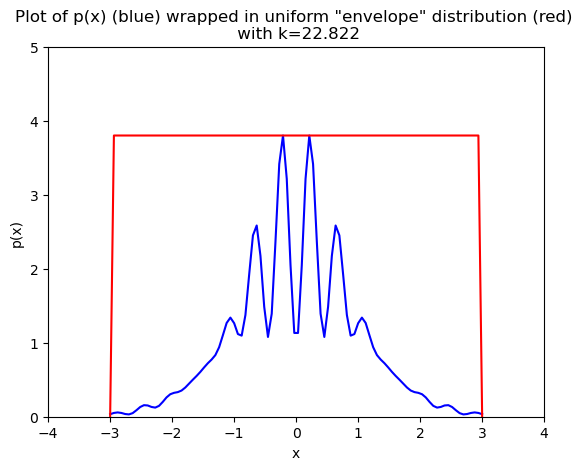

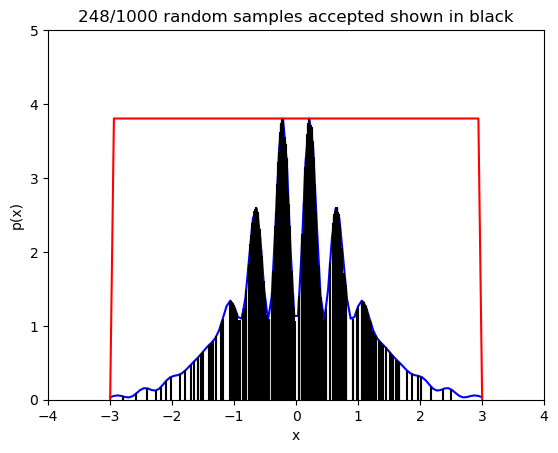

In [4]:
# 1. we define a uniform distribution from -3 to 3 
    # stats.uniform.pdf(x, loc=-3, scale=6)
    # q(z) = int_-3_3(q(x))dx = 1 => q(x)*(3 - (-3)) = 1 => q(z) = 1/6

# 2. Now we have to find a k that satisfies kq(z) >= p(z) for all z
    # k*1/6 >= p(z) => k=6*p_max

p_max = max(p(x))
k = 6*p_max

# plot of target distribution and envelope distribution
plt.plot(x, p(x), color='blue')
plt.plot(x, k*stats.uniform.pdf(x, loc=-2.999, scale=5.999), color="red")

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'Plot of p(x) (blue) wrapped in uniform "envelope" distribution (red) \n with k={round(k,3)}')
plt.xlim(-4,4)
plt.ylim(0,5)
plt.show()

# 3. draw pairs of samples z~q(z) and u~U(0,1)
# 4. reject of u > p(z)/kq(z)

iter=1000
samples_accepted = []
for i in range(iter):
    # draw pairs of samples
    z = np.random.uniform(-3,3)
    u = np.random.uniform(0,1)
    # calculate acceptance/rejection rate
    ratio = p(z)/(k*(1/6))
    # check if accept
    if u <= ratio: 
        samples_accepted.append(z)

# plot accepted samples
plt.plot(x, p(x), color='blue')
plt.plot(x, k*stats.uniform.pdf(x, loc=-2.999, scale=5.999), color="red")

for z in samples_accepted: 
    plt.vlines(z, 0, p(z), color='black')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'{len(samples_accepted)}/{iter} random samples accepted shown in black')
plt.xlim(-4,4)
plt.ylim(0,5)
plt.show()

We will now need to calculate $E[x^2]$ of the accepted samples. Here we will make use of the Monte Carlo estimate... ?  $$E[x^2] = \int_{-3}^3 p(x)x^2dx ≈ \frac{1}{L} \sum_{-3}^3 x^2 $$

In [5]:
# Now we will compute E[x^2] of the accepted samples

expectation_x2 = 0
for z in samples_accepted: 
    expectation_x2 += z**2

expectation_x2 = expectation_x2/len(samples_accepted)

print(f"E[x^2]={round(expectation_x2,3)}")

E[x^2]=0.905


## Part 2

Sample from p(x) and calulcate $E[x^2]$ using rejection sampling with a normal distribution

Idea: 
- Wrap target distribution $p(z)$ in envelope distribution $q(z)$ - here normal distribution - from which we draw samples from.
- Choose a constant k so that $kq(z) >= p(z)$ for all z.
- Draw pairs of samples: $z \sim q(z) $ and $u \sim \mathcal{U}(0,1)$.
- Reject sample if $u > \frac{p(z)}{kq(z)}$.

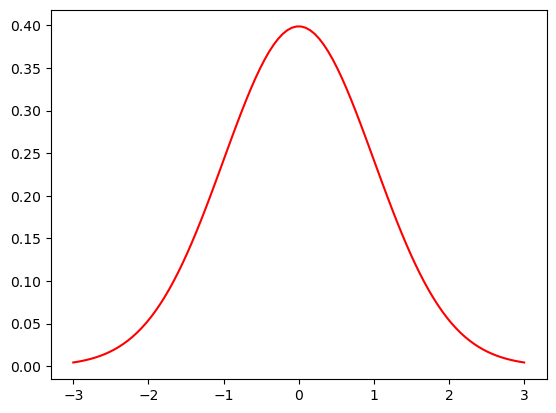

In [16]:
# Step 1
def q(x): 
    return stats.norm.pdf(x, loc=0, scale=1)

x = np.linspace(-3, 3, 100)

plt.plot(x, q(x), color='red')
plt.show()

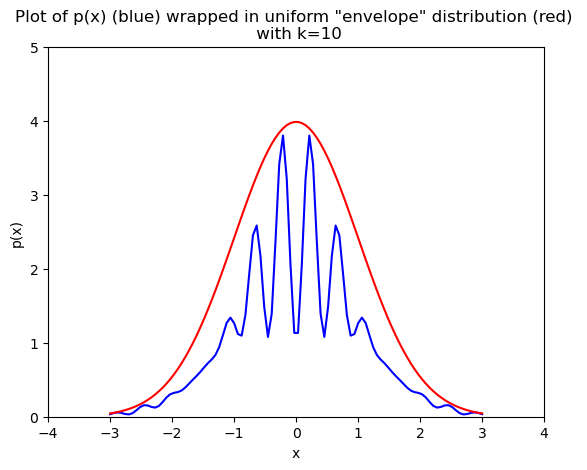

In [ ]:
# Step 2 

# I've found a k that satisfies kq(z) >= p(z) for all z
k = 10

# plot of target distribution and envelope distribution
plt.plot(x, p(x), color='blue')
plt.plot(x, k*stats.norm.pdf(x, loc=0, scale=1), color="red")

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'Plot of p(x) (blue) wrapped in uniform "envelope" distribution (red) \n with k={round(k,3)}')
plt.xlim(-4,4)
plt.ylim(0,5)
plt.show()

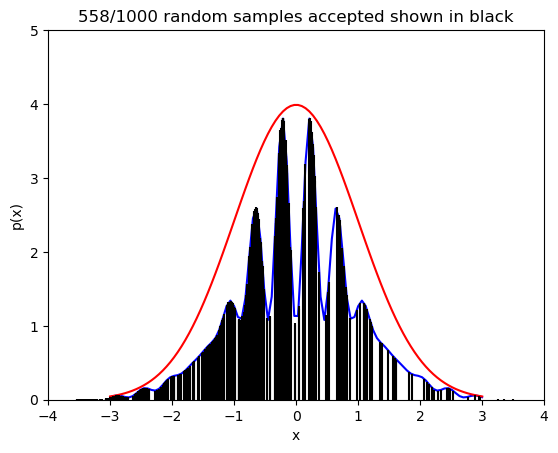

In [17]:
# Step 3: draw pairs of samples z~q(z) and u~U(0,1)
# Step 4: reject of u > p(z)/kq(z)

k=10
iter=1000
samples_accepted = []
for i in range(iter):
    # draw pairs of samples
    z = np.random.normal(-3,3)
    u = np.random.uniform(0,1)
    # calculate acceptance/rejection rate
    ratio = p(z)/(k*q(z))
    # check if accept
    if u <= ratio: 
        samples_accepted.append(z)

# plot accepted samples
plt.plot(x, p(x), color='blue')
plt.plot(x, k*stats.norm.pdf(x, loc=0, scale=1), color="red")

for z in samples_accepted: 
    plt.vlines(z, 0, p(z), color='black')

plt.xlabel('x')
plt.ylabel('p(x)')
plt.title(f'{len(samples_accepted)}/{iter} random samples accepted shown in black')
plt.xlim(-4,4)
plt.ylim(0,5)
plt.show()

In [18]:
# Now we will compute E[x^2] of the accepted samples

expectation_x2 = 0
for z in samples_accepted: 
    expectation_x2 += z**2

expectation_x2 = expectation_x2/len(samples_accepted)

print(f"E[x^2]={round(expectation_x2,3)}")

E[x^2]=17.994


## Part 3

Sample from p(x) and calulcate $E[x^2]$ using self-normalized importance sampling with a gaussian proposal


In [ ]:
# TODO 

We will now need to calculate $E[x^2]$ of the accepted samples. $E[x^2]$ is: $$E[x^2] = \int_{-3}^3 p(x)x^2dx = \int_{-3}^3 x^2\frac{p(x)}{q(x)}q(x)dx ≈ \frac{1}{L} \sum_{-3}^3 \frac{p(x)}{q(x)}x^2 $$